# Fast.AI Computational Linear Algebra

In [25]:
# Imports
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline
np.set_printoptions(suppress=True)

## Topic Modeling with NMF and SVD    

## Lesson 2

In [72]:
# Get Newsgroups data from sklearn
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics','sci.space']
remove = ['headers','footers','quotes']
newsgroups_train = fetch_20newsgroups(subset='train', 
                                     categories=categories,
                                     remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     categories=categories,
                                     remove=remove)

In [73]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [74]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [75]:
# First 3 items in data
print('\n'.join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [76]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], 
      dtype='<U18')

In [77]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [78]:
num_topics, num_top_words = 6,8

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [80]:
# Count non-stop words using a dense matrix (to make it easier for this exercise)
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [81]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [82]:
vocab = np.array(vectorizer.get_feature_names())

In [83]:
vocab.shape

(26576,)

In [84]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar', 'costing', 'costly',
       'costruction', 'costs', 'cosy', 'cote', 'couched', 'couldn', 'council', 'councils',
       'counsel', 'counselees', 'counselor', 'count'], 
      dtype='<U80')

### Singular Value Decomposition (SVD)

In [85]:
# Orthomormal -> Dot product with itself is 1, dot product with other vectors is 0
# Orthogonal matrix -> Columns and rows are orthonormal
# A = U∑V^T -> U orthogonal, ∑ relative importance (singular values), V^T rows are orthonormal
# Want to capture very different features
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 37s, sys: 6.96 s, total: 1min 44s
Wall time: 1min 6s


In [86]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


#### Check if U,s,Vh is SVD of vectors

In [87]:
# Take a vector and make square matrix using diag
# Norm to get to one number
reconstructed_vectors = U @ np.diag(s) @ Vh
# np.linalg.norm(reconstructed_vectors - vectors)
np.allclose(reconstructed_vectors, vectors)

True

#### Confirm U and Vh are orthonormal

In [88]:
# Multiply by the transpose and compare to identity
np.allclose(U.T @ U, np.eye(U.shape[0]))
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

#### Singular values (importance)

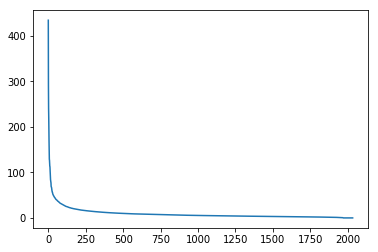

In [89]:
plt.plot(s);

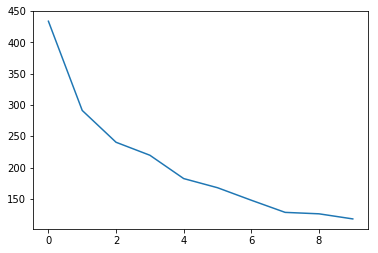

In [90]:
plt.plot(s[:10]);

#### Find largest word values for topics

In [91]:
num_top_words = 8
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [92]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

### Non-negative Matrix Factorization (NMF)

In [93]:
m,n = vectors.shape
d = 5

In [94]:
clf = decomposition.NMF(n_components=d, random_state=1)

In [95]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [96]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

#### TFIDF

In [97]:
# TF = (# occurrences of term t in document) / (# of words in documents)
# IDF = log(# of documents / # documents with term t in it)
# Advantage is it is Fast
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [98]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [99]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

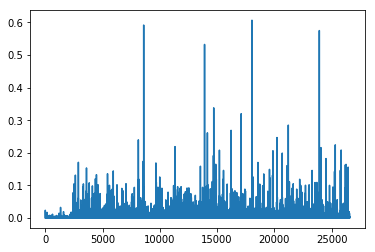

In [100]:
plt.plot(clf.components_[0]);

In [101]:
clf.reconstruction_err_

43.7129

### NMF using SGD

#### Gradient Descent Intro

In [18]:
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [61]:
def lin(a,b,x): return a*x+b

In [62]:
a=3; b=8

In [63]:
n=30; x = random(n) ; y = lin(a,b,x)

In [64]:
x

array([ 0.8696,  0.7865,  0.2902,  0.7865,  0.0841,  0.3567,  0.1198,  0.859 ,  0.2131,  0.7349,
        0.9373,  0.2843,  0.4793,  0.7543,  0.0087,  0.7409,  0.5969,  0.1996,  0.1215,  0.0419,
        0.5478,  0.827 ,  0.6274,  0.3499,  0.8594,  0.2713,  0.3064,  0.3562,  0.7358,  0.623 ])

In [65]:
y

array([ 10.6088,  10.3594,   8.8705,  10.3594,   8.2524,   9.0701,   8.3593,  10.577 ,   8.6393,
        10.2046,  10.812 ,   8.853 ,   9.4379,  10.263 ,   8.0261,  10.2228,   9.7906,   8.5989,
         8.3645,   8.1256,   9.6435,  10.4809,   9.8823,   9.0496,  10.5782,   8.814 ,   8.9193,
         9.0685,  10.2075,   9.8691])

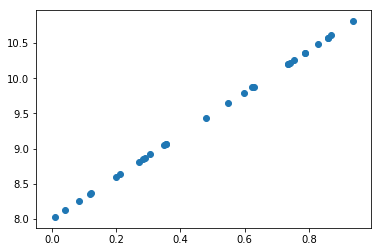

In [66]:
plt.scatter(x,y);

In [67]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y,lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [68]:
a_guess = -1; b_guess = 1; avg_loss(y,a_guess,b_guess,x)

9.0421

In [69]:
lr = 0.05

In [70]:
def upd():
    global a_guess, b_guess
    # Make prediction using current weights
    y_pred = lin(a_guess, b_guess, x)
    # Calculate the change of the loss
    dydb = 2*(y_pred - y)
    dyda = x*dydb
    # Update the weights in the direction of steepest change
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [71]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()
def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return line
ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani

#### SGD

In [102]:
# Take loss on minibatch of data rather than all data
# Minimize frobenius norm of V - WH for NMF
lam = 1e3
lr = 1e-2
m,n = vectors_tfidf.shape

In [103]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [104]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [106]:
mu = 1e-6
def grads(M,W,H):
    R = W @ H-M
    return R @ H.T + penalty(W, mu)*lam, W.T @ R + penalty(H, mu)*lam

In [107]:
# Want non-negative numbers so penalize if number less than or close to 0
def penalty(M, mu):
    return np.where(M>=mu,0,np.min(M-mu,0))

In [108]:
# SGD update
def upd(M,W,H,lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [109]:
# Print out norm, min, and count of negative numbers in W and H
def report(M,W,H):
    print(np.linalg.norm(M-W @ H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [110]:
# Initialize W and H to random normal
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [111]:
report(vectors_tfidf, W, H)

44.4271849282 6.02597823822e-06 6.45082303688e-08 0 0


In [112]:
upd(vectors_tfidf, W, H, lr)

In [113]:
report(vectors_tfidf, W, H)

44.4191288299 -0.000705635056544 -8.27892814415e-05 135 309


In [114]:
for i in range(50):
    upd(vectors_tfidf, W, H, lr)
    if i % 10 == 0: report(vectors_tfidf, W, H)

44.4130041211 -0.000605199298328 -6.48539163914e-05 144 262
44.3744632054 -0.000347894209353 -5.97779319313e-05 57 491
44.3455532256 -0.000275118231146 -6.17314257414e-05 38 892
44.3134511162 -0.000148757236444 -9.15794010427e-05 26 1546
44.2782786586 -9.73723279073e-05 -0.000125434376513 31 2221


In [115]:
show_topics(H)

['space god don people does just know think',
 'space god just people don think like does',
 'god space just don think like people know',
 'just don think god know people space like',
 'people space don god know think does like']

#### PyTorch

In [118]:
# Tensor and Neural Network framework with GPU acceleration
import torch
import torch.cuda as tc
from torch.autograd import Variable

In [119]:
def V(M): return Variable(M, requires_grad=True)

In [120]:
v = vectors_tfidf.todense()

In [122]:
t_vectors = torch.Tensor(v.astype(np.float32))  #.cuda()

In [123]:
mu = 1e-5

In [124]:
def grads_t(M,W,H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W,mu)*lam,
            W.t().mm(R) + penalty_t(H,mu)*lam)

def penalty_t(M,mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M-mu, max=0)

def upd_t(M,W,H,lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H):
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [125]:
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_()
t_H.normal_(std=0.01).abs_()

AssertionError: Torch not compiled with CUDA enabled